# Detecção de Intrusões em Redes Usando Random Forest


## Metodologia

O dataset escolhido foi retirado da plataforma Kaggle:  
> [Network Intrusion Detection Dataset](https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection)

O conjunto contém registros de tráfego de rede rotulados como normal ou pertencentes a diferentes tipos de ataques.

As etapas metodológicas incluem:

- Carregamento e visualização dos dados
- Limpeza e pré-processamento
- Treinamento do modelo
- Avaliação usando métricas padrão
    

In [1]:
# Código simplificado

# 4.1 Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
    

In [2]:
# Código simplificado

# 4.2 Carregamento do dataset
df = pd.read_csv("Train_data.csv")

# Visualização inicial
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
# Código simplificado
# Colunas categóricas nominais
colunas_categoricas = ['protocol_type', 'flag', 'service']

# Dicionário para armazenar os encoders caso precise inverter depois
encoders = {}

for coluna in colunas_categoricas:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    encoders[coluna] = le  # Guarda o encoder para possível inversão futura

# Verifica se cada valor é string (ou seja, não numérico)
nao_numericos_por_coluna = df.applymap(lambda x: isinstance(x, str)).sum()

# Renomeando para Label para evitar confusão
df.rename(columns={'class': 'Label'}, inplace=True)

# Codificar a coluna alvo
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

    

C:\Users\João Lucas\AppData\Local\Temp\ipykernel_18252\27778552.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nao_numericos_por_coluna = df.applymap(lambda x: isinstance(x, str)).sum()


In [4]:
# Código simplificado
# Separar atributos e rótulo
X = df.drop('Label', axis=1)
y = df['Label']

# Dividir em treino e teste (random_state para reprodutibilidade)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
# 4.4 Treinamento do modelo
model = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)
    


##  Resultados e Discussão

O modelo Random Forest apresentou um desempenho excelente na classificação do dataset, alcançando uma acurácia de 96,67%. As métricas de precisão, recall e F1-score para ambas as classes se aproximaram do valor máximo, indicando que o classificador foi capaz de identificar corretamente tanto conexões normais quanto ataques, mantendo um equilíbrio eficiente entre falsos positivos e falsos negativos. O conjunto de dados utilizado mostrou-se balanceado, com suporte semelhante para as duas classes, o que contribui para a confiabilidade da avaliação do modelo.

Além disso, a análise da importância das features revelou que variáveis relacionadas ao volume de dados transmitidos, como src_bytes e dst_bytes, juntamente com taxas de serviços específicas, são as principais responsáveis pelas decisões do modelo. Muitas outras variáveis apresentaram importância mínima, sugerindo que poderiam ser removidas para simplificar o modelo sem prejudicar seu desempenho. Essa avaliação estatística oferece uma base sólida para futuras otimizações e melhor compreensão do comportamento do classificador.

In [14]:
# Código simplificado
from sklearn.metrics import accuracy_score, classification_report

# Acurácia geral
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.4f}\n")

# Relatório detalhado
# print("Relatório de Classificação:")
# print(classification_report(y_test, y_pred))

Acurácia: 0.9667



=== Desempenho do Modelo ===
Acurácia: 0.9667
Precisão: 0.9678
Recall: 0.9667
F1-Score: 0.9666


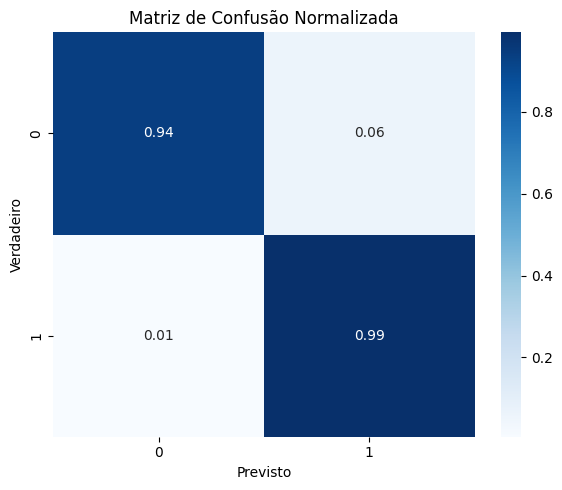

In [24]:
# Avaliação completa do modelo com gráfico detalhado
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Cálculo das métricas ---
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted', zero_division=0)
revocacao = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metricas = {
    'Acurácia': acuracia,
    'Precisão': precisao,
    'Recall': revocacao,
    'F1-Score': f1
}

print("=== Desempenho do Modelo ===")
for nome, valor in metricas.items():
    print(f"{nome}: {valor:.4f}")


# --- Matriz de confusão (normalizada em porcentagem) ---
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão Normalizada")
plt.tight_layout()
plt.show()


Importância das Features:
src_bytes                      0.209584
same_srv_rate                  0.101433
dst_bytes                      0.099217
flag                           0.088010
dst_host_same_srv_rate         0.072071
dst_host_srv_count             0.069778
logged_in                      0.062773
diff_srv_rate                  0.044892
serror_rate                    0.042304
srv_serror_rate                0.037511
protocol_type                  0.022813
count                          0.022443
dst_host_diff_srv_rate         0.021046
dst_host_srv_diff_host_rate    0.017849
dst_host_same_src_port_rate    0.017245
dst_host_srv_serror_rate       0.013699
dst_host_rerror_rate           0.010956
service                        0.007568
dst_host_serror_rate           0.007414
srv_rerror_rate                0.006671
srv_count                      0.006169
dst_host_count                 0.005831
dst_host_srv_rerror_rate       0.005281
hot                            0.002727
rerror_rate   

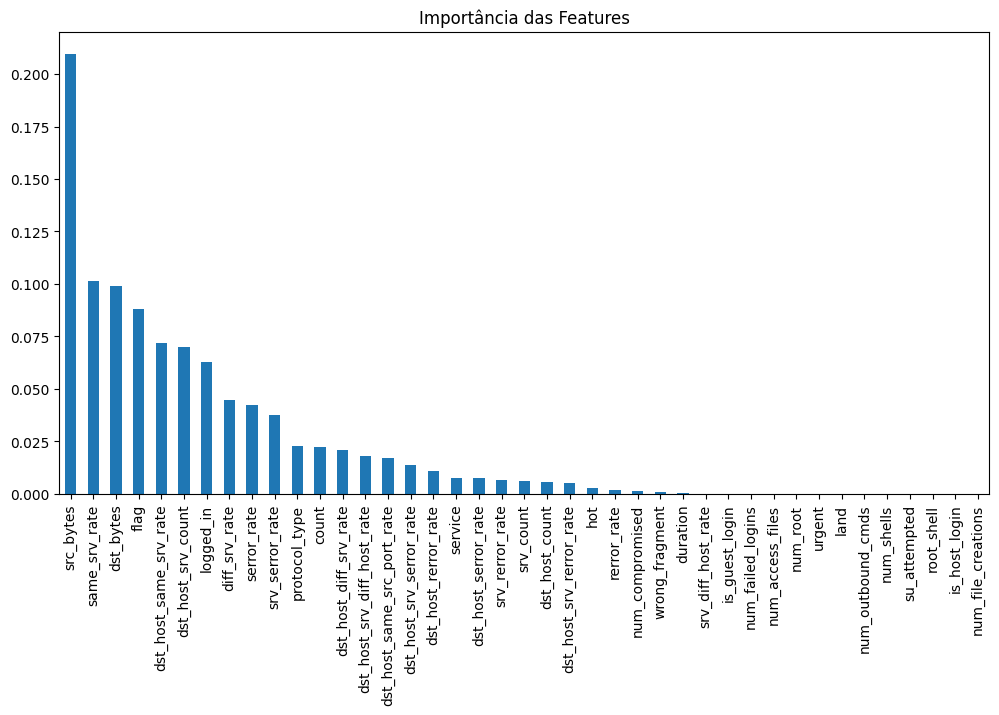

In [11]:
# Código simplificado
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Importância das Features:")
print(importances)

plt.figure(figsize=(12,6))
importances.plot(kind='bar')
plt.title("Importância das Features")
plt.show()


##  Conclusão

O uso do Random Forest para classificação em cibersegurança mostrou-se bastante promissor para a previsão de ataques reais em redes de computadores. O modelo não apenas demonstra alta precisão, como também oferece insights importantes sobre quais características do tráfego de rede são mais indicativas de atividades maliciosas. Esses conhecimentos podem ser aplicados para fortalecer sistemas de detecção de intrusões, permitindo respostas mais rápidas e eficazes contra ameaças cibernéticas. Dessa forma, o estudo reforça a importância do machine learning como uma ferramenta estratégica para proteger ambientes digitais em um cenário de crescentes riscos de segurança.